In [1]:
#Packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import sweetviz as sv

#Packages for model evaluation and classification models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from pickle import dump
from pickle import load
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('onehot.csv')

In [3]:
df.head()

,Gndr_F,Gndr_M,Gndr_O,State_Abrvtn_AA,State_Abrvtn_AE,State_Abrvtn_AK,State_Abrvtn_AL,State_Abrvtn_AP,State_Abrvtn_AR,State_Abrvtn_AS,State_Abrvtn_AZ,State_Abrvtn_CA,State_Abrvtn_CO,State_Abrvtn_CT,State_Abrvtn_DC,State_Abrvtn_DE,State_Abrvtn_FL,State_Abrvtn_GA,State_Abrvtn_GU,State_Abrvtn_HI,State_Abrvtn_IA,State_Abrvtn_ID,State_Abrvtn_IL,State_Abrvtn_IN,State_Abrvtn_KS,State_Abrvtn_KY,State_Abrvtn_LA,State_Abrvtn_MA,State_Abrvtn_MD,State_Abrvtn_ME,State_Abrvtn_MI,State_Abrvtn_MN,State_Abrvtn_MO,State_Abrvtn_MP,State_Abrvtn_MS,State_Abrvtn_MT,State_Abrvtn_NC,State_Abrvtn_ND,State_Abrvtn_NE,State_Abrvtn_NH,State_Abrvtn_NJ,State_Abrvtn_NM,State_Abrvtn_NV,State_Abrvtn_NY,State_Abrvtn_OH,State_Abrvtn_OK,State_Abrvtn_OR,State_Abrvtn_PA,State_Abrvtn_PR,State_Abrvtn_RI,State_Abrvtn_SC,State_Abrvtn_SD,State_Abrvtn_TN,State_Abrvtn_TX,State_Abrvtn_UT,State_Abrvtn_VA,State_Abrvtn_VI,State_Abrvtn_VT,State_Abrvtn_WA,State_Abrvtn_WI,State_Abrvtn_WV,State_Abrvtn_WY,State_Abrvtn_XX,State_Abrvtn_ZZ,RUCA_0.0,RUCA_1.0,RUCA_1.1,RUCA_2.0,RUCA_2.1,RUCA_3.0,RUCA_4.0,RUCA_4.1,RUCA_5.0,RUCA_5.1,RUCA_6.0,RUCA_7.0,RUCA_7.1,RUCA_7.2,RUCA_8.0,RUCA_8.1,RUCA_8.2,RUCA_9.0,RUCA_10.0,RUCA_10.1,RUCA_10.2,RUCA_10.3,RUCA_99.0,Type_Addiction Medicine,Type_Adult Congenital Heart Disease,Type_Advanced Heart Failure and Transplant Cardiology,Type_All Other Suppliers,Type_Allergy/ Immunology,Type_Ambulance Service Provider,Type_Ambulatory Surgical Center,Type_Anesthesiology,Type_Anesthesiology Assistant,Type_Audiologist,Type_Cardiac Surgery,Type_Cardiology,Type_Centralized Flu,Type_Certified Clinical Nurse Specialist,Type_Certified Nurse Midwife,Type_Certified Registered Nurse Anesthetist (CRNA),Type_Chiropractic,Type_Clinic or Group Practice,Type_Clinical Cardiac Electrophysiology,Type_Clinical Laboratory,Type_Colorectal Surgery (Proctology),Type_Critical Care (Intensivists),Type_Dentist,Type_Dermatology,Type_Diagnostic Radiology,Type_Emergency Medicine,Type_Endocrinology,Type_Family Practice,Type_Gastroenterology,Type_General Practice,Type_General Surgery,Type_Geriatric Medicine,Type_Geriatric Psychiatry,Type_Gynecological Oncology,Type_Hand Surgery,Type_Hematology,Type_Hematology-Oncology,Type_Hematopoietic Cell Transplantation and Cellular Therapy,Type_Home Infusion Therapy Services,Type_Hospice and Palliative Care,Type_Hospitalist,Type_Independent Diagnostic Testing Facility (IDTF),Type_Infectious Disease,Type_Intensive Cardiac Rehabilitation,Type_Internal Medicine,Type_Interventional Cardiology,Type_Interventional Pain Management,Type_Interventional Radiology,Type_Licensed Clinical Social Worker,Type_Mammography Center,Type_Mass Immunizer Roster Biller,Type_Maxillofacial Surgery,Type_Medical Genetics and Genomics,Type_Medical Oncology,Type_Medical Toxicology,Type_Medicare Diabetes Preventive Program,Type_Micrographic Dermatologic Surgery,Type_Nephrology,Type_Neurology,Type_Neuropsychiatry,Type_Neurosurgery,Type_Nuclear Medicine,Type_Nurse Practitioner,Type_Obstetrics & Gynecology,Type_Occupational Therapist in Private Practice,Type_Ophthalmology,Type_Opioid Treatment Program,Type_Optometry,Type_Oral Surgery (Dentist only),Type_Orthopedic Surgery,Type_Osteopathic Manipulative Medicine,Type_Otolaryngology,Type_Pain Management,Type_Pathology,Type_Pediatric Medicine,Type_Peripheral Vascular Disease,Type_Pharmacy,Type_Physical Medicine and Rehabilitation,Type_Physical Therapist in Private Practice,Type_Physician Assistant,Type_Plastic and Reconstructive Surgery,Type_Podiatry,Type_Portable X-Ray Supplier,Type_Preventive Medicine,Type_Psychiatry,"Type_Psychologist, Clinical",Type_Public Health or Welfare Agency,Type_Pulmonary Disease,Type_Radiation Oncology,Type_Radiation Therapy Center,Type_Registered Dietitian or Nutrition Professional,Type_Rheumatology,Type_Sleep Medicine,Type_Slide Preparation Facility,Type_Speech Language Pathologist,Type_Sports Medicine,Type_Surgical Oncology,Type_Thoracic Surgery,Type_Undefined Physician type,Type_Undersea and Hyperbaric Medici

In [4]:
df.eligibility.value_counts()

0    1114151
1       9438
Name: eligibility, dtype: int64

In [5]:
df.shape

(1123589, 199)

In [6]:
df.eligibility.value_counts(normalize=True).mul(100).round(2)

0    99.16
1     0.84
Name: eligibility, dtype: float64

# 5% Validation

In [7]:
df_val, X_test, y_train, y_test = train_test_split(df, df.eligibility, test_size=0.95, stratify = df.eligibility, random_state=42)

In [8]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(df_val.drop(columns = ['eligibility'], axis = 1), df_val.eligibility, test_size=0.2, random_state=42)

# 10% Train and Test

Spliting 10% for further spliting into train and test 80%

In [9]:
df_val_10, X_test, y_train, y_test = train_test_split(df, df.eligibility, test_size=0.90, stratify = df.eligibility, random_state=42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_val_10.drop(columns = ['eligibility'], axis = 1), df_val_10.eligibility, test_size=0.2, random_state=42)

Models

In [11]:
models = []
models.append(('LR', LogisticRegression(solver = 'saga')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [12]:
%%time
scoring = ('recall', 'accuracy')
num_folds = 5
results_recall = []
results_accuracy = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_validate(model, X_train_val, y_train_val, cv=kfold, scoring=scoring)
    results_recall.append(cv_results['test_recall'])
    results_accuracy.append(cv_results['test_accuracy'])
    
    names.append(name)
    
    #print(name, cv_results)

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike oth

Wall time: 4min 59s


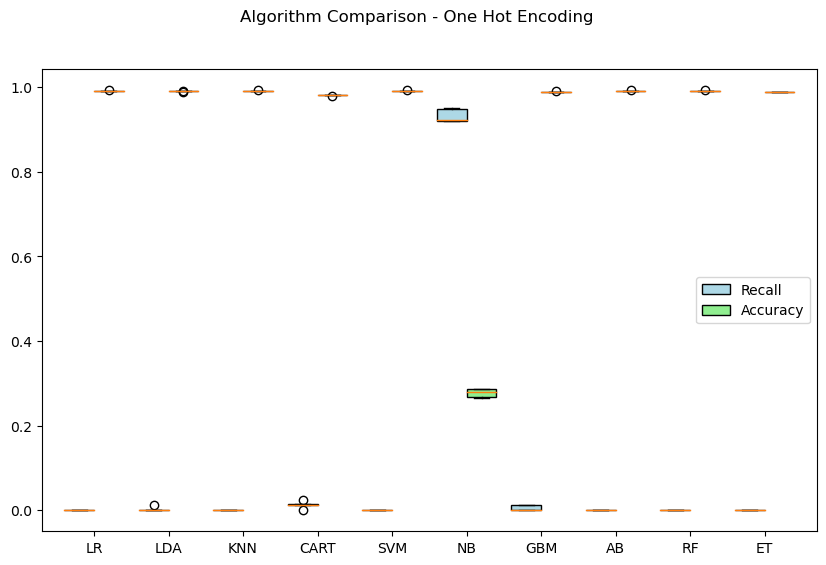

In [13]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - One Hot Encoding')
ax = fig.add_subplot(111)
boxplot_recall = ax.boxplot(results_recall,positions=np.arange(len(names)) - 0.2, widths=0.4, patch_artist=True )
boxplot_accuracy = ax.boxplot(results_accuracy, positions=np.arange(len(names)) + 0.2, widths=0.4, patch_artist=True)

colors = ['lightblue', 'lightgreen']  # Define colors for clarity
for boxplot, color in zip([boxplot_recall, boxplot_accuracy], colors):
    for box in boxplot['boxes']:
        box.set_facecolor(color)

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)

ax.legend([boxplot_recall['boxes'][0], boxplot_accuracy['boxes'][0]], ['Recall', 'Accuracy'])

fig.set_size_inches(10,6)
pyplot.show()

# Under-sampling

In [14]:
df_under = pd.concat([X_train_val, y_train_val], axis=1)

In [15]:
df_under.eligibility.value_counts()

0    44553
1      390
Name: eligibility, dtype: int64

In [16]:
fraud_df = df_under.loc[df['eligibility'] == 1]
non_fraud_df = df_under.loc[df['eligibility'] == 0][:390]

In [17]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_under= df_new["eligibility"]
X_train_under = df_new.loc[:, df.columns != 'eligibility']

In [18]:
df_new.eligibility.value_counts()

0    390
1    390
Name: eligibility, dtype: int64

In [19]:
%%time
scoring = ('recall', 'accuracy')
num_folds = 5
results_recall = []
results_accuracy = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_validate(model, X_train_under, y_train_under, cv=kfold, scoring=scoring)
    results_recall.append(cv_results['test_recall'])
    results_accuracy.append(cv_results['test_accuracy'])
    
    names.append(name)
    
    print(name, ': Completed')

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike oth

LR : Completed
LDA : Completed
KNN : Completed
CART : Completed
SVM : Completed
NB : Completed
GBM : Completed
AB : Completed
RF : Completed
ET : Completed
Wall time: 4 s


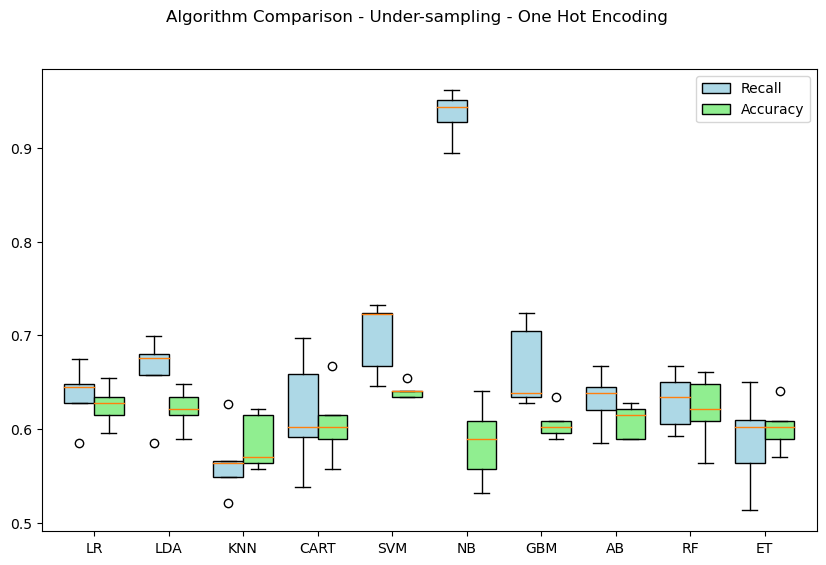

In [20]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Under-sampling - One Hot Encoding')
ax = fig.add_subplot(111)
boxplot_recall = ax.boxplot(results_recall,positions=np.arange(len(names)) - 0.2, widths=0.4, patch_artist=True )
boxplot_accuracy = ax.boxplot(results_accuracy, positions=np.arange(len(names)) + 0.2, widths=0.4, patch_artist=True)

colors = ['lightblue', 'lightgreen']  # Define colors for clarity
for boxplot, color in zip([boxplot_recall, boxplot_accuracy], colors):
    for box in boxplot['boxes']:
        box.set_facecolor(color)

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)

ax.legend([boxplot_recall['boxes'][0], boxplot_accuracy['boxes'][0]], ['Recall', 'Accuracy'])

fig.set_size_inches(10,6)
pyplot.show()

# Over-sampling

In [21]:
smote = SMOTE(random_state=42)
X_train_smote_val, y_train_smote_val = smote.fit_resample(X_train_val, y_train_val)

In [22]:
y_train_smote_val.value_counts()

0    44553
1    44553
Name: eligibility, dtype: int64

In [23]:
%%time
scoring = ('recall', 'accuracy')
num_folds = 5
results_recall = []
results_accuracy = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_validate(model, X_train_smote_val, y_train_smote_val, cv=kfold, scoring=scoring)
    results_recall.append(cv_results['test_recall'])
    results_accuracy.append(cv_results['test_accuracy'])
    
    names.append(name)
    
    print(name, ': Completed')

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR : Completed
LDA : Completed


C:\Users\ronal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN : Completed
CART : Completed
SVM : Completed
NB : Completed
GBM : Completed
AB : Completed
RF : Completed
ET : Completed
Wall time: 30min 6s


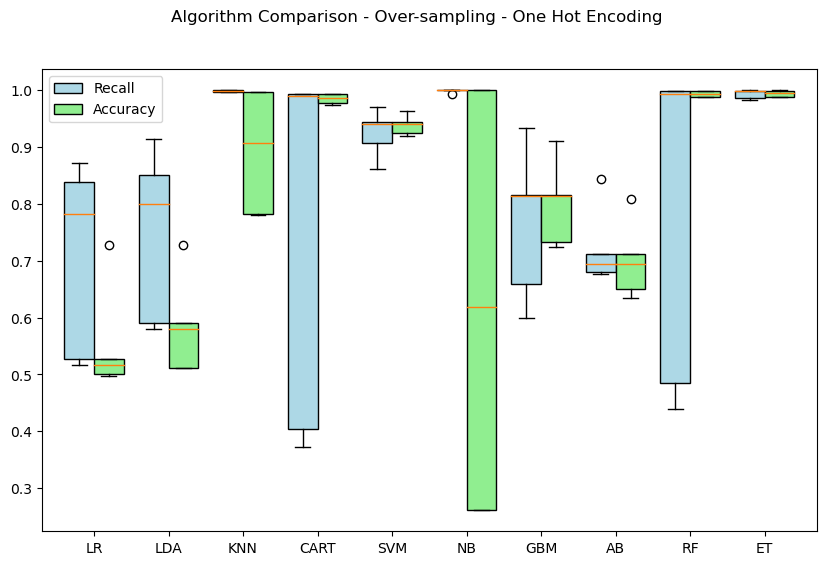

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Over-sampling - One Hot Encoding')
ax = fig.add_subplot(111)
boxplot_recall = ax.boxplot(results_recall,positions=np.arange(len(names)) - 0.2, widths=0.4, patch_artist=True )
boxplot_accuracy = ax.boxplot(results_accuracy, positions=np.arange(len(names)) + 0.2, widths=0.4, patch_artist=True)

colors = ['lightblue', 'lightgreen']  # Define colors for clarity
for boxplot, color in zip([boxplot_recall, boxplot_accuracy], colors):
    for box in boxplot['boxes']:
        box.set_facecolor(color)

ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)

ax.legend([boxplot_recall['boxes'][0], boxplot_accuracy['boxes'][0]], ['Recall', 'Accuracy'])

fig.set_size_inches(10,6)
pyplot.show()

# Best model - Under-sampling

In [25]:
df_under = pd.concat([X_train, y_train], axis=1)

In [26]:
df_under.eligibility.value_counts()

0    89107
1      779
Name: eligibility, dtype: int64

In [27]:
fraud_df = df_under.loc[df['eligibility'] == 1]
non_fraud_df = df_under.loc[df['eligibility'] == 0][:779]

In [28]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_under= df_new["eligibility"]
X_train_under = df_new.loc[:, df.columns != 'eligibility']

In [29]:
model = LogisticRegression(solver = 'saga')
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     22307
           1       0.01      0.72      0.02       165

    accuracy                           0.58     22472
   macro avg       0.50      0.65      0.38     22472
weighted avg       0.99      0.58      0.73     22472



C:\Users\ronal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


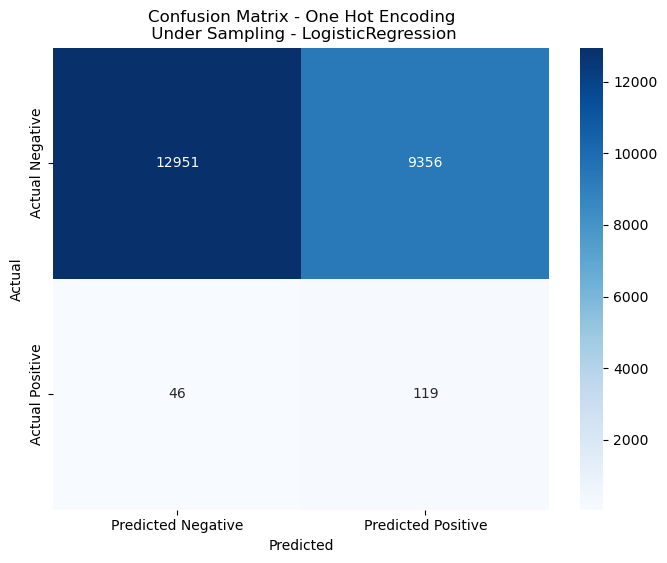

In [30]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

In [31]:
model = SVC()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     22307
           1       0.01      0.71      0.02       165

    accuracy                           0.59     22472
   macro avg       0.50      0.65      0.38     22472
weighted avg       0.99      0.59      0.74     22472



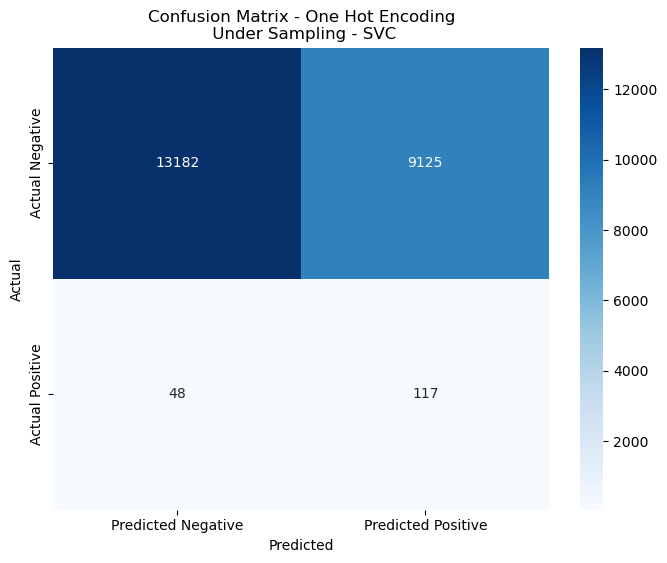

In [32]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

In [33]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72     22307
           1       0.01      0.75      0.02       165

    accuracy                           0.57     22472
   macro avg       0.50      0.66      0.37     22472
weighted avg       0.99      0.57      0.72     22472



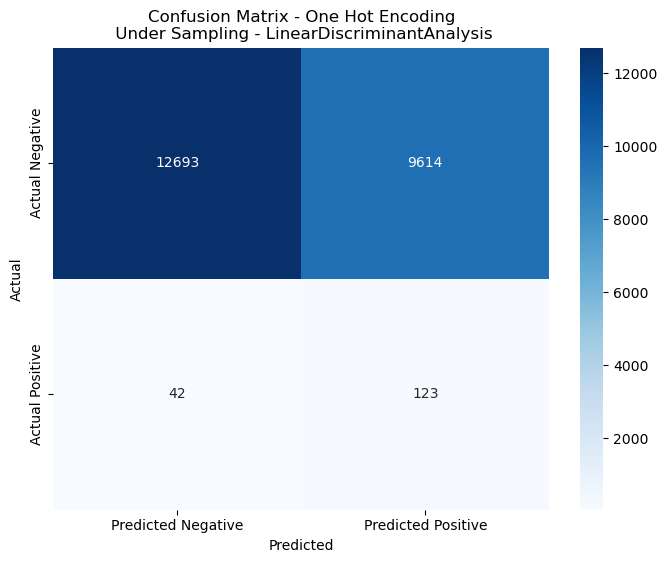

In [34]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

In [35]:
model = GradientBoostingClassifier()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     22307
           1       0.01      0.77      0.03       165

    accuracy                           0.57     22472
   macro avg       0.51      0.67      0.38     22472
weighted avg       0.99      0.57      0.72     22472



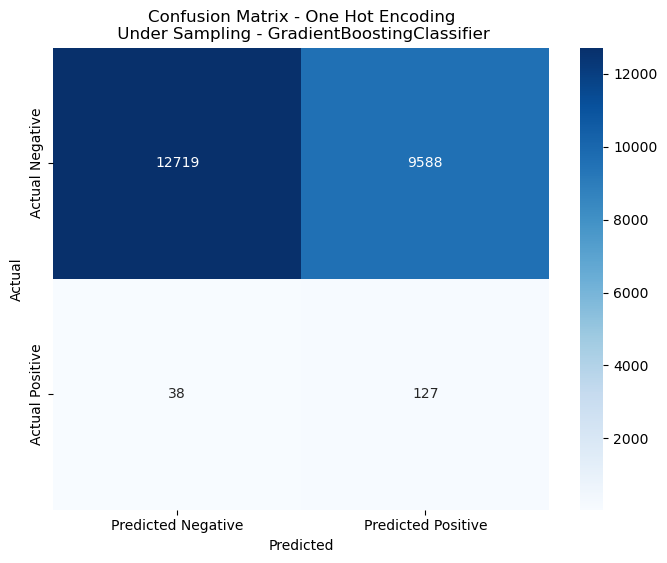

In [36]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

In [37]:
model = AdaBoostClassifier()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74     22307
           1       0.01      0.73      0.03       165

    accuracy                           0.59     22472
   macro avg       0.50      0.66      0.38     22472
weighted avg       0.99      0.59      0.73     22472



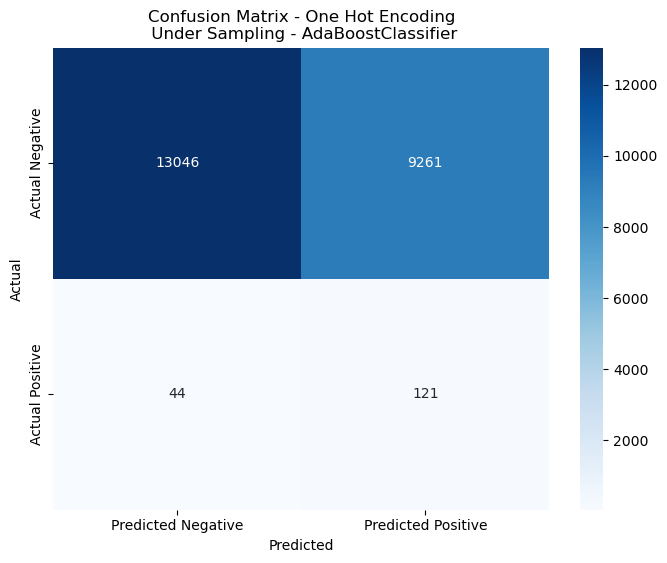

In [38]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

In [39]:
model = RandomForestClassifier()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     22307
           1       0.01      0.72      0.03       165

    accuracy                           0.60     22472
   macro avg       0.50      0.66      0.39     22472
weighted avg       0.99      0.60      0.74     22472



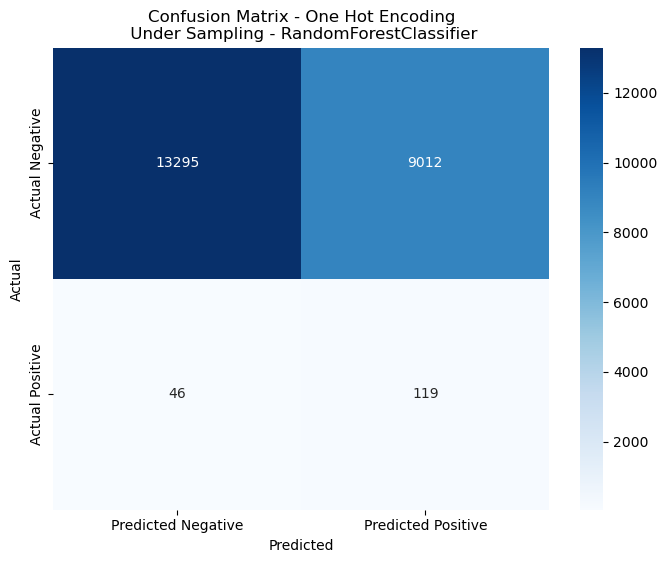

In [40]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling - {type(model).__name__}')
plt.show()

# Best model - Over-sampling

In [41]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [42]:
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.99      0.87      0.93     22307
           1       0.01      0.21      0.02       165

    accuracy                           0.87     22472
   macro avg       0.50      0.54      0.48     22472
weighted avg       0.99      0.87      0.92     22472



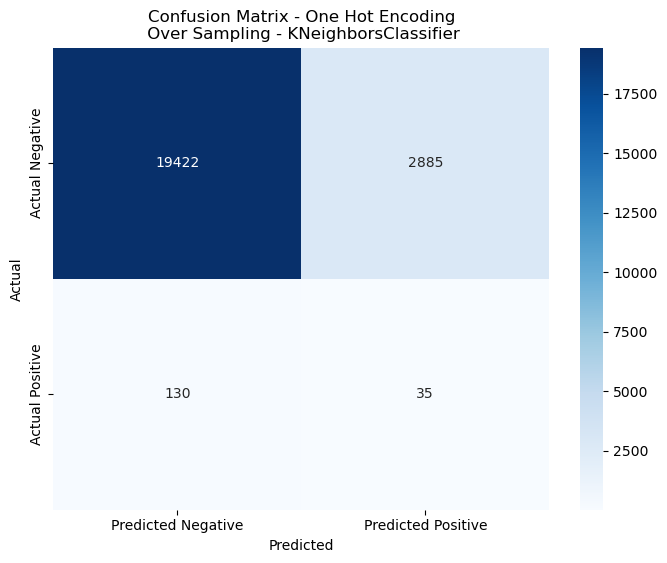

In [43]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

In [44]:
model = SVC()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     22307
           1       0.02      0.10      0.03       165

    accuracy                           0.95     22472
   macro avg       0.50      0.53      0.50     22472
weighted avg       0.99      0.95      0.97     22472



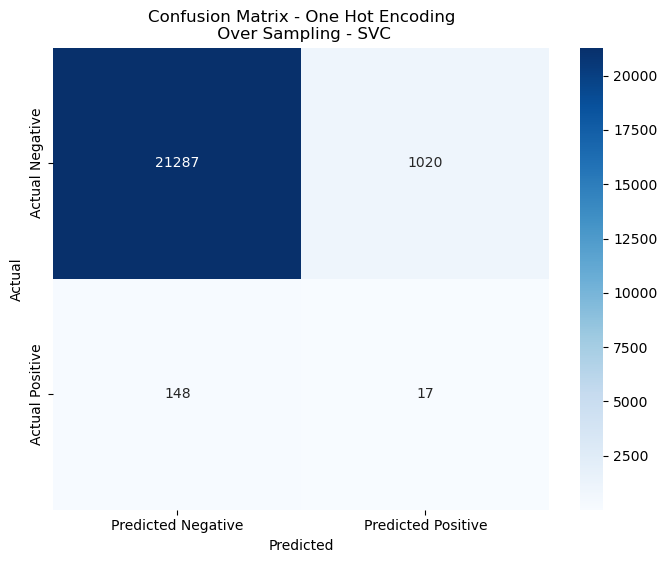

In [45]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

In [46]:
model = GradientBoostingClassifier()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     22307
           1       0.02      0.33      0.03       165

    accuracy                           0.87     22472
   macro avg       0.51      0.60      0.48     22472
weighted avg       0.99      0.87      0.92     22472



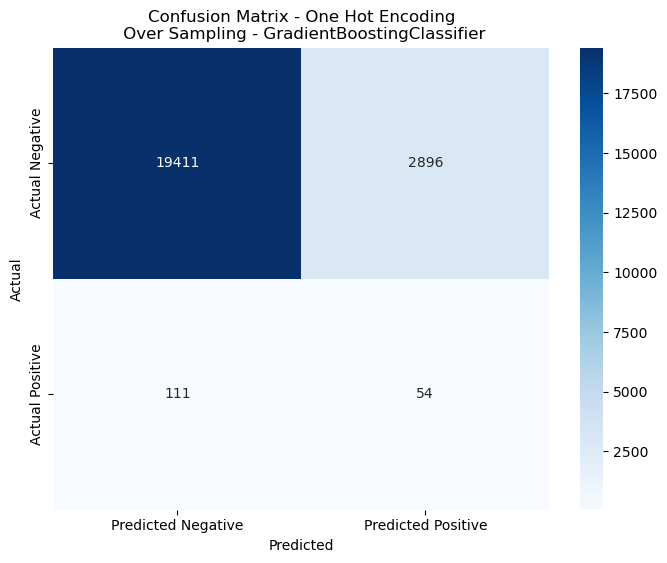

In [47]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

In [48]:
model = AdaBoostClassifier()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     22307
           1       0.02      0.53      0.03       165

    accuracy                           0.77     22472
   macro avg       0.51      0.65      0.45     22472
weighted avg       0.99      0.77      0.86     22472



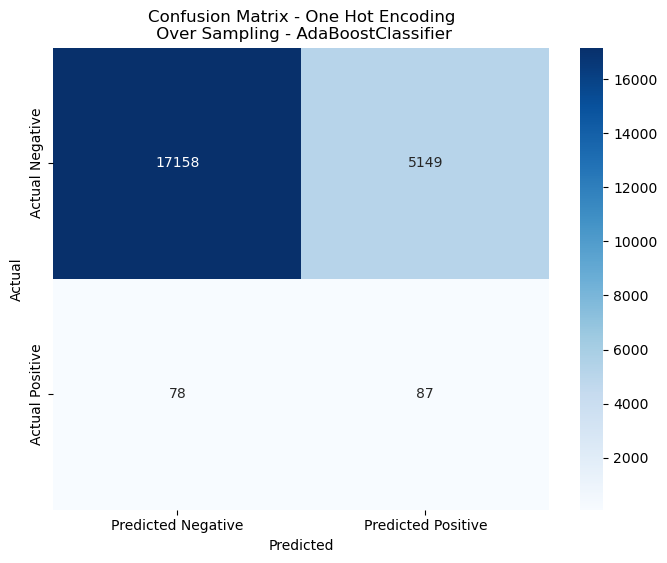

In [49]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

In [50]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22307
           1       0.01      0.01      0.01       165

    accuracy                           0.99     22472
   macro avg       0.50      0.50      0.50     22472
weighted avg       0.99      0.99      0.99     22472



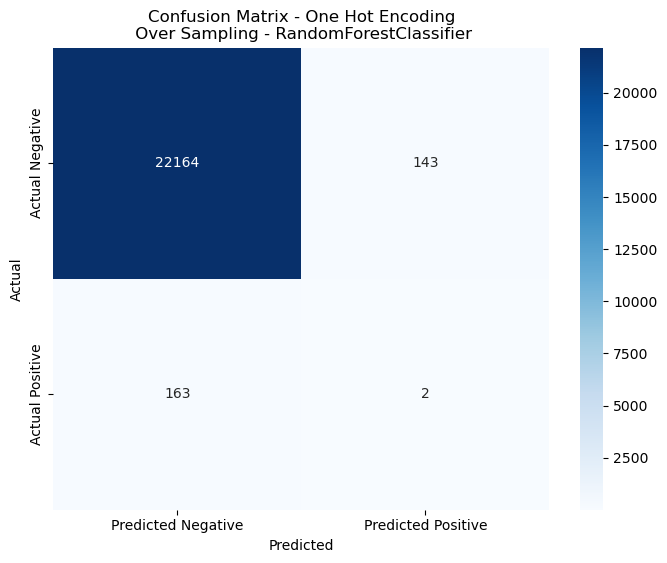

In [51]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

In [52]:
model = ExtraTreesClassifier()
model.fit(X_train_smote, y_train_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22307
           1       0.02      0.02      0.02       165

    accuracy                           0.98     22472
   macro avg       0.51      0.51      0.51     22472
weighted avg       0.99      0.98      0.98     22472



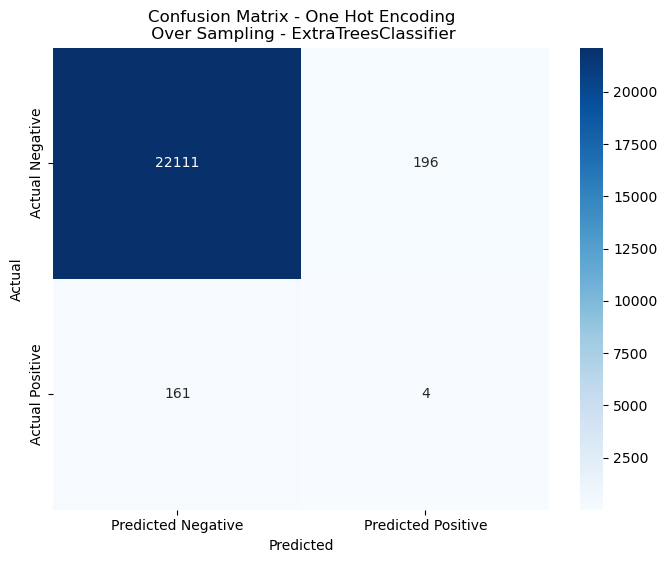

In [53]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Over Sampling - {type(model).__name__}')
plt.show()

# 50% Train and Test

In [54]:
df_val_50, X_test, y_train, y_test = train_test_split(df, df.eligibility, test_size=0.5, stratify = df.eligibility, random_state=42)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_val_50.drop(columns = ['eligibility'], axis = 1), df_val_50.eligibility, test_size=0.2, random_state=42)

In [56]:
df_under = pd.concat([X_train, y_train], axis=1)

In [57]:
count = len(df_under[df_under.eligibility == 1])

In [58]:
fraud_df = df_under.loc[df['eligibility'] == 1]
non_fraud_df = df_under.loc[df['eligibility'] == 0][:count]

In [59]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_under= df_new["eligibility"]
X_train_under = df_new.loc[:, df.columns != 'eligibility']

In [60]:
model = GradientBoostingClassifier()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73    111414
           1       0.02      0.76      0.03       945

    accuracy                           0.58    112359
   macro avg       0.51      0.67      0.38    112359
weighted avg       0.99      0.58      0.73    112359



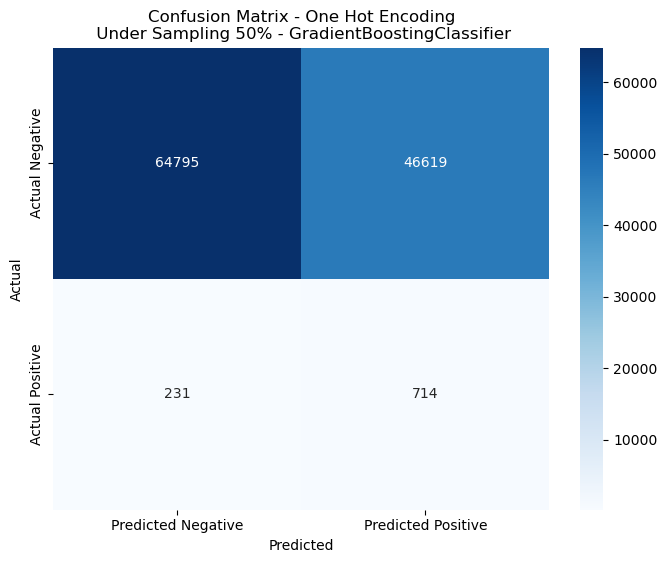

In [61]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling 50% - {type(model).__name__}')
plt.show()

In [62]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73    111414
           1       0.01      0.74      0.03       945

    accuracy                           0.58    112359
   macro avg       0.51      0.66      0.38    112359
weighted avg       0.99      0.58      0.73    112359



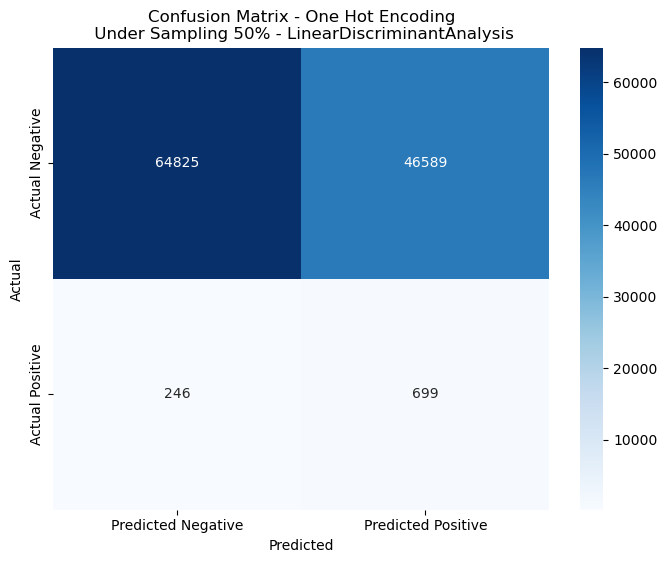

In [63]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling 50% - {type(model).__name__}')
plt.show()

In [64]:
model = SVC()
model.fit(X_train_under, y_train_under)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74    111414
           1       0.02      0.73      0.03       945

    accuracy                           0.59    112359
   macro avg       0.51      0.66      0.39    112359
weighted avg       0.99      0.59      0.74    112359



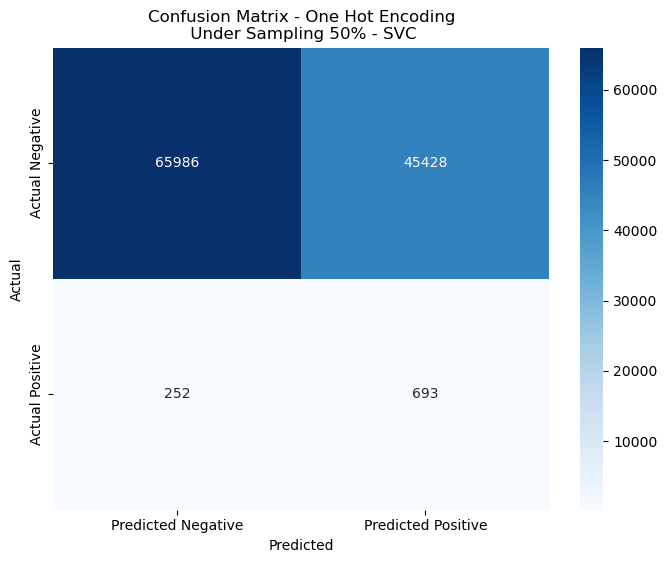

In [65]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - One Hot Encoding\n Under Sampling 50% - {type(model).__name__}')
plt.show()